In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick 
%matplotlib inline


# Loading the data file

In [3]:
data= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Looking  at the top 5 records of the data

In [4]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analyzing the data for better understanding 

1> Checking the shape of the data-set.

In [5]:
data.shape

(7043, 21)

2> checking columns names

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

3> checking colounm data-types

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can see that the Total charges is an object therefore we need to change its data-type When we clean the data. 

4> checking the ststistical inference of the data-type, By doing this we will get a better understanding of the  relation between different statistical arrtibutes. 

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


. we can see that 75% of the customers have tenure less than 55 months

. we can also see that the distribution is not proper

. the average monthly charges is $64.76, which gives us an idea that 25% customers pay more than the average    charge

5> Aanlyzing the CHURN column

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

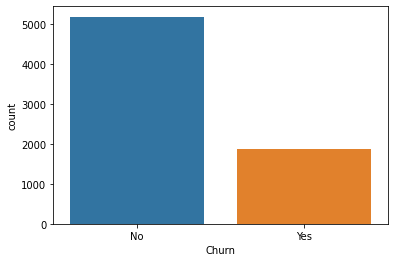

In [10]:
sns.countplot(x='Churn',data=data)

We can see that the Churn is maximum for NO

We can also state that the data-set is highly Imbalanced

6> Analyzing Data for Missing Values

In [11]:
#numerical inference
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

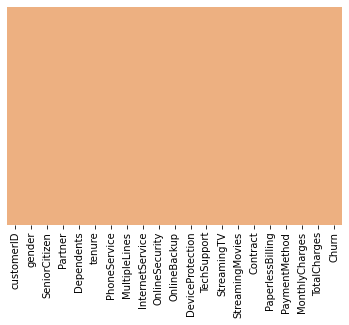

In [12]:
#creating a heat map to plot missing value(visual inference)

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='flare')

Therefore we can say that there are no missing values in our data-set

# Cleaning the data

1> Creating a copy of the orignal Data-set

In [13]:
new_data=data.copy()



2> As we had seen earlier we need to change the data-type of the Total charges coloumn for Object to numeric.

In [14]:
new_data.TotalCharges=pd.to_numeric(new_data.TotalCharges,errors='coerce')

3> Checking for missing values after changing the data type of the Total charges coloumn

In [15]:
new_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 missing values in the Total charges coloumn

4> Looking at the Null Records

In [16]:
new_data.loc[new_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since we have only 11 missing records in the total dataset which sums up to a vey small percentage of it, therefore we can drop the missing records from our data-set. 

5> Dropping missing values

In [17]:
new_data.dropna(how='any',inplace=True)

In [18]:
[features for features in new_data.columns if new_data[features].isnull().sum()>0]

[]

we can see that there are no columns with null values anymore.

Getting the max tenure.

In [19]:
print(new_data['tenure'].max())

72


Grouping Users based on Tenure in a bin of 12 months.

In [20]:

labels=["{0}-{1}".format(i,i+11)for i in range(1,72,12)]
new_data['tenure_group']=pd.cut(new_data.tenure,range(1,80,12),right=False,labels=labels)


In [21]:
new_data['tenure_group'].value_counts().sort_values()

37-48     762
25-36     832
49-60     832
13-24    1024
61-72    1407
1-12     2175
Name: tenure_group, dtype: int64

Graphically Vusualizing Tenure Groups

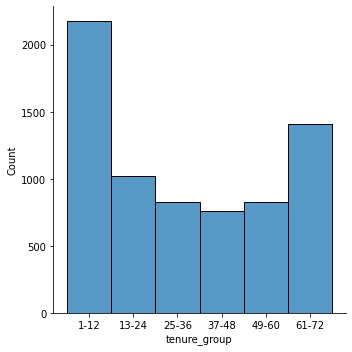

In [22]:
sns.displot(x=new_data.tenure_group)

6> Removing columns not required for processing

In [23]:
new_data.drop(columns=[	'customerID','tenure'], axis=1, inplace=True)

new_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration

1> Distribution plot for all columns.

In [24]:
for coloumn in new_data:
    print(coloumn)

gender
SeniorCitizen
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
tenure_group


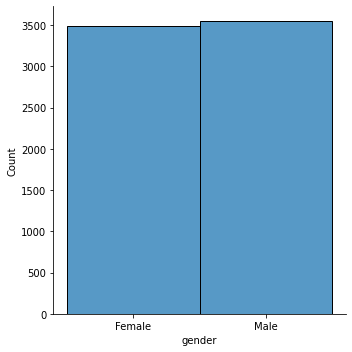

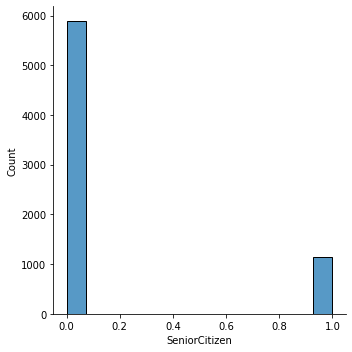

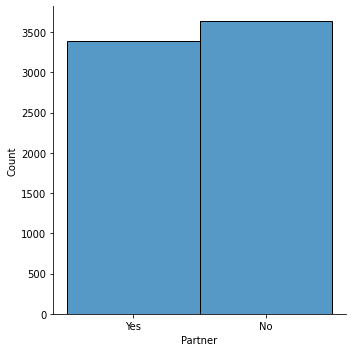

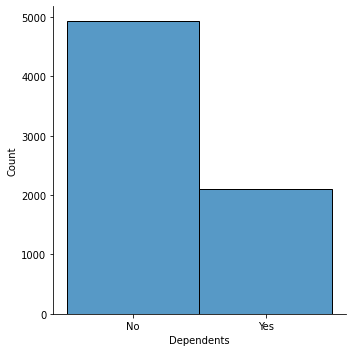

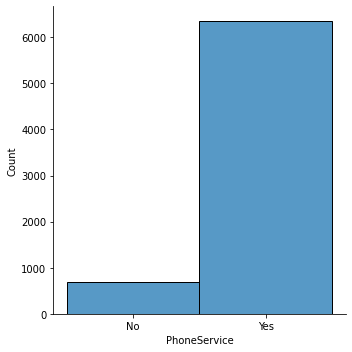

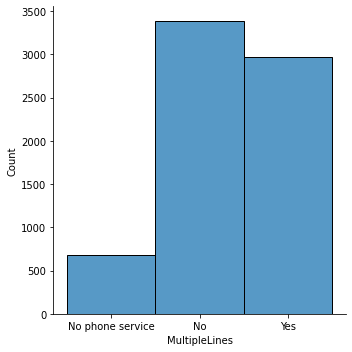

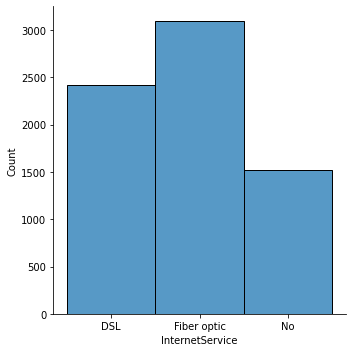

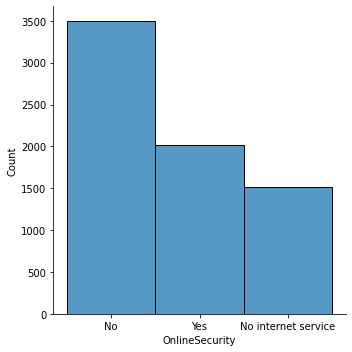

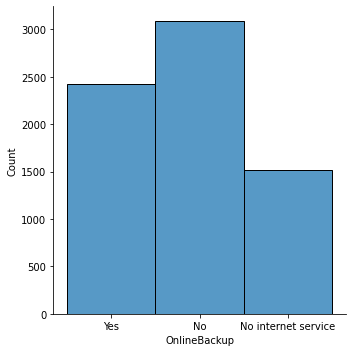

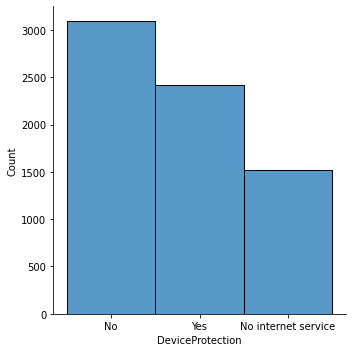

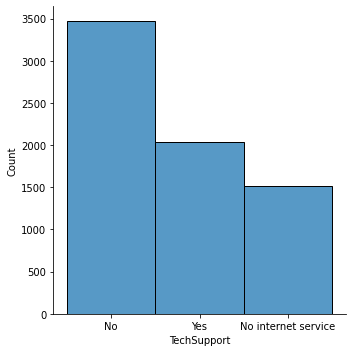

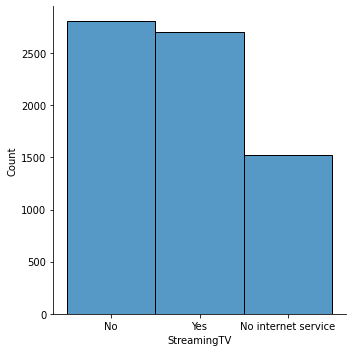

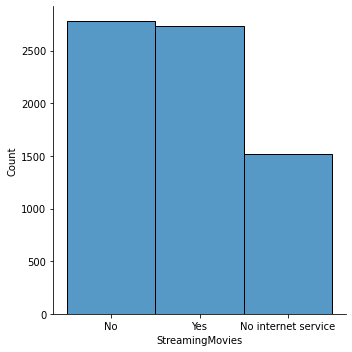

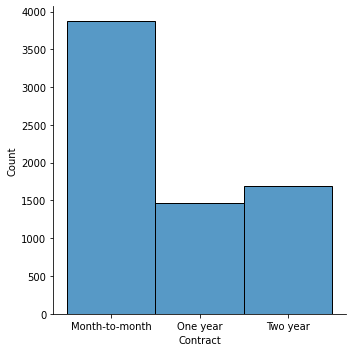

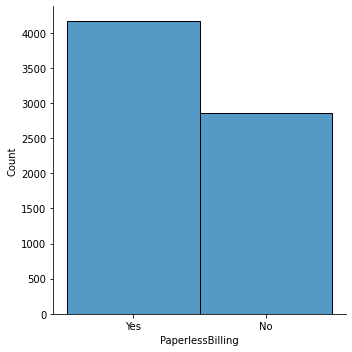

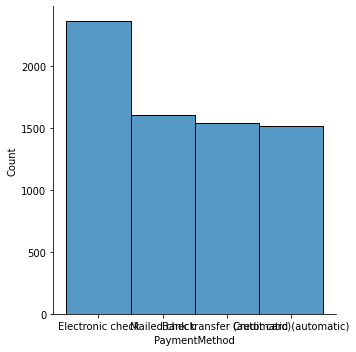

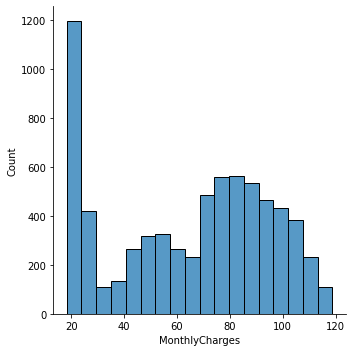

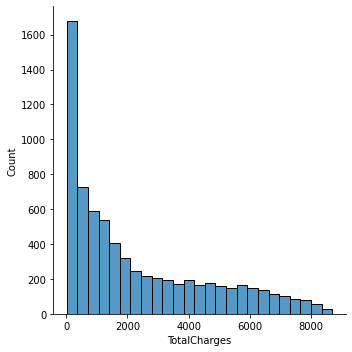

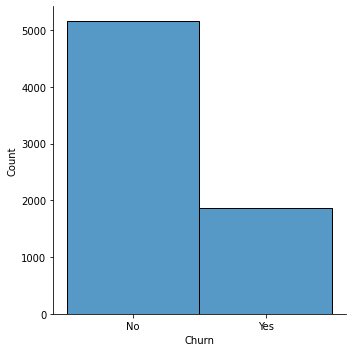

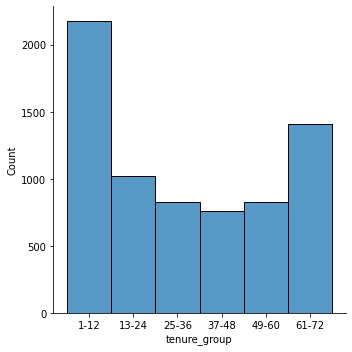

In [25]:
for coloumn in new_data:
    sns.displot(x=coloumn,data=new_data)

2> UNIVARETE ANALYSIS

Plotting all the columns with respect to churn 

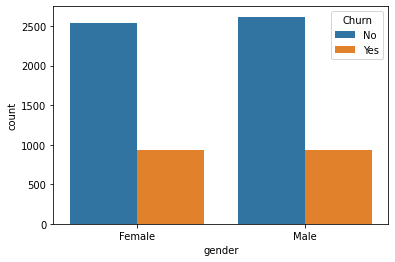

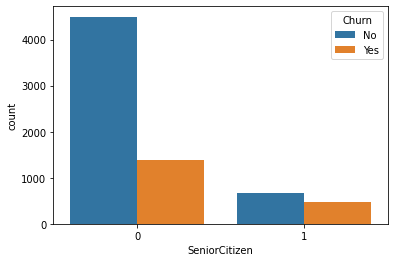

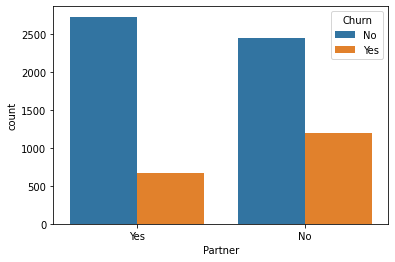

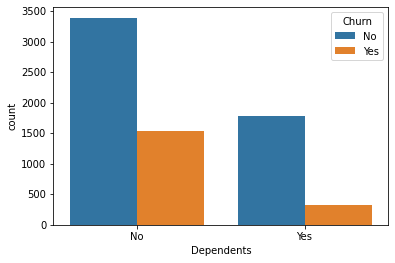

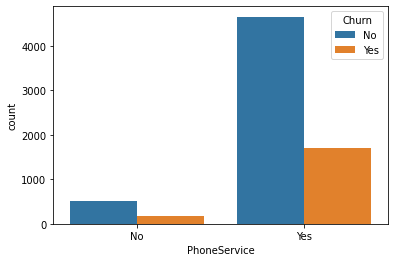

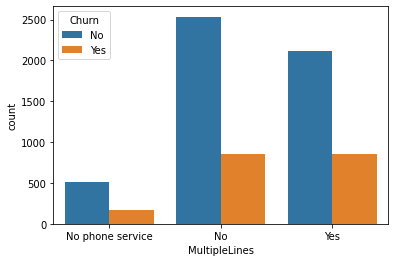

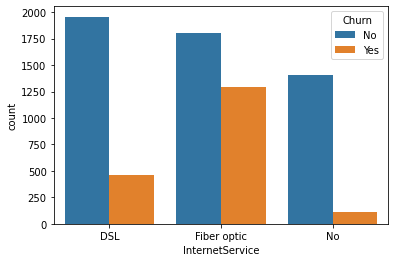

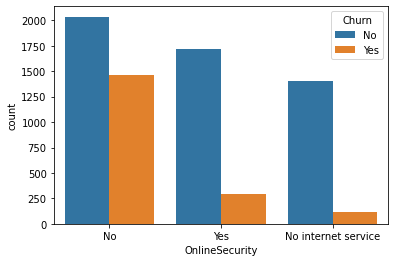

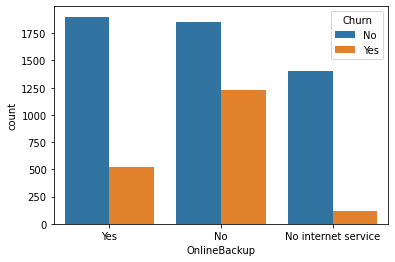

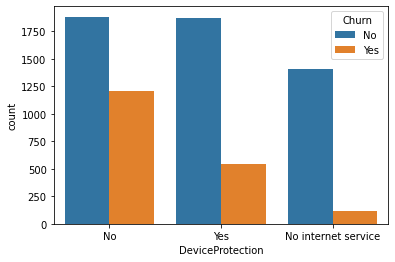

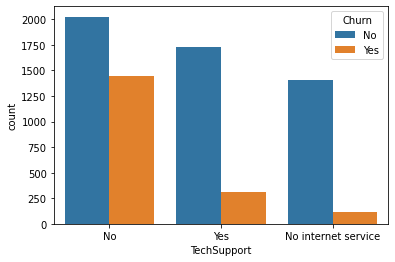

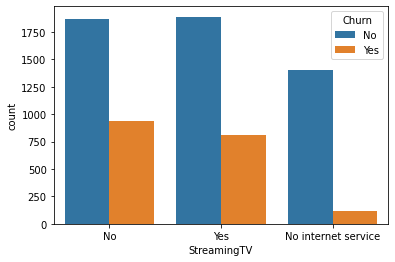

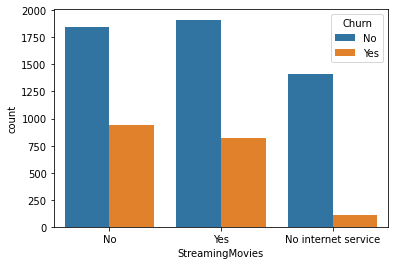

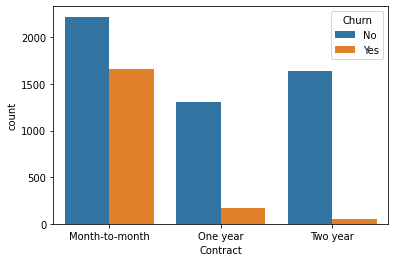

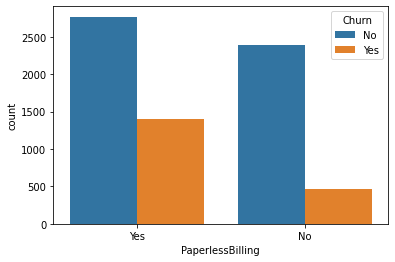

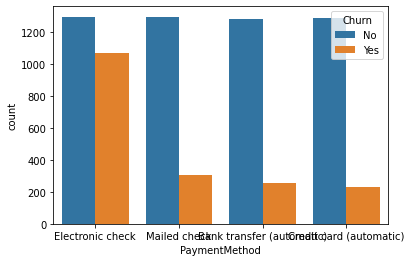

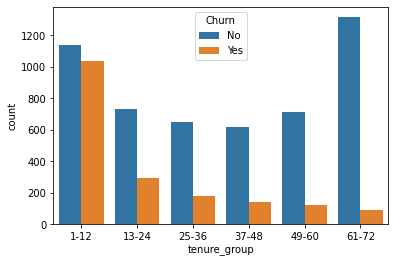

In [26]:
for i, predictor in enumerate(new_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_data,x=predictor,hue="Churn")
    

3> Converting Target varaible into Binary Variable

In [27]:
new_data['Churn']=np.where(new_data.Churn=='Yes',1,0)


4> converting categorical vairables to dummy varables

In [28]:
new_data_dummies=pd.get_dummies(new_data)
new_data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


5> visualizing the important parameters affecting the Churn

<AxesSubplot:>

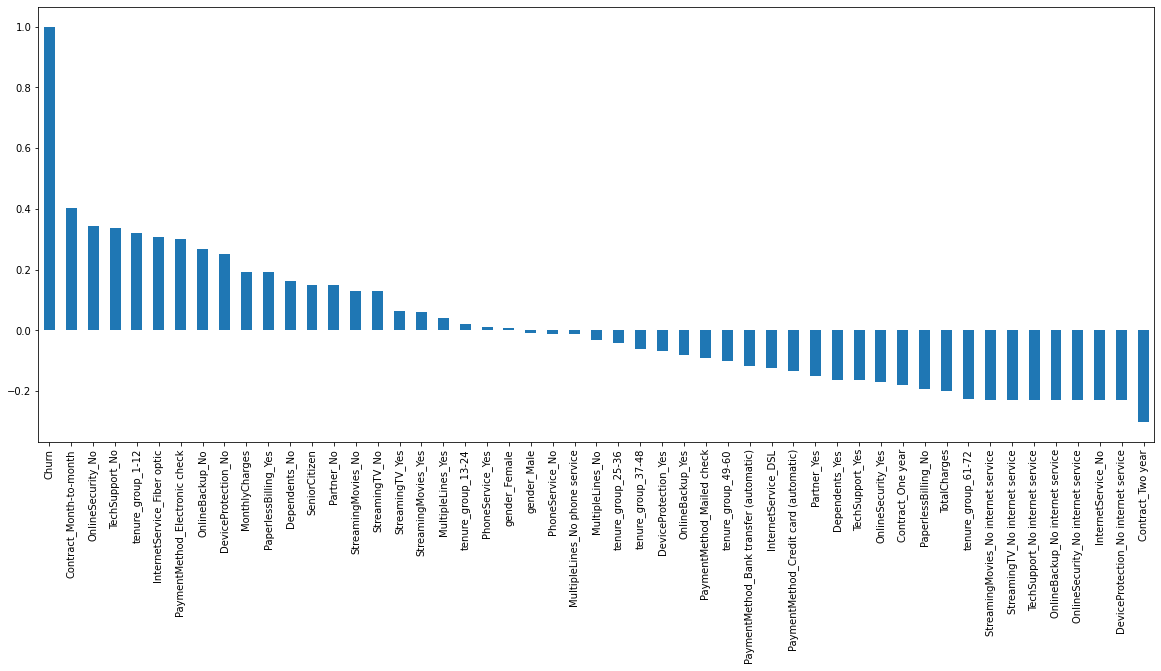

In [29]:
plt.figure(figsize=(20,8))
new_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

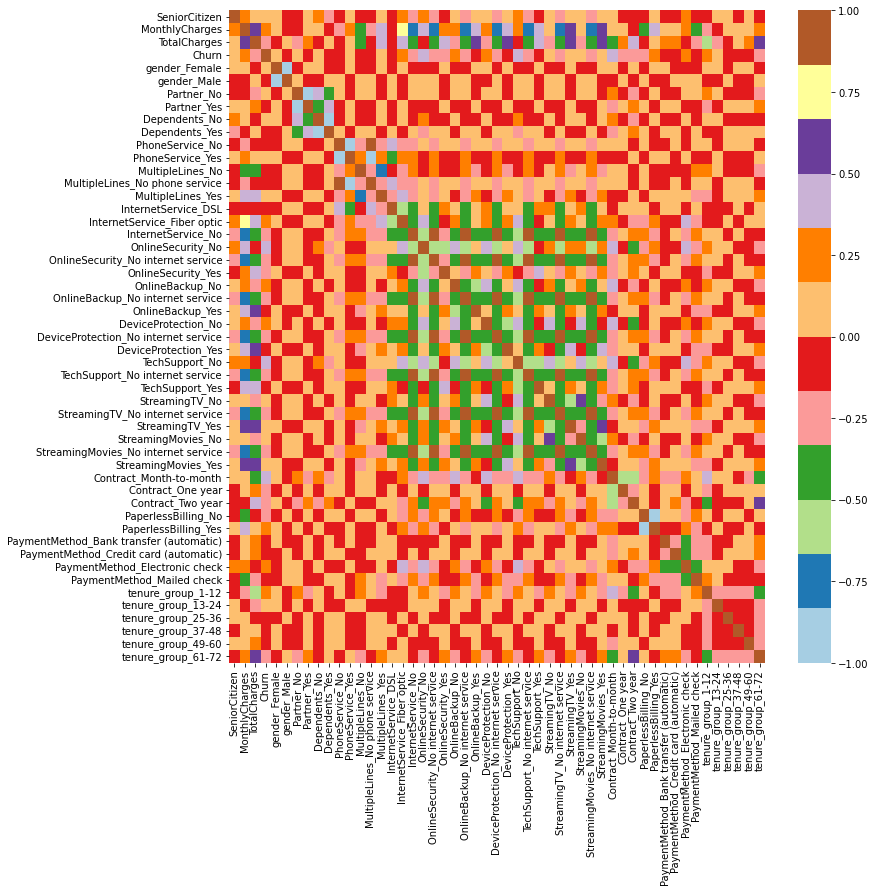

In [30]:
#plotting corelation matrix

plt.figure(figsize=(12,12))
sns.heatmap(new_data_dummies.corr(),cmap='Paired')

OUTLIER DETECTION USING BOX PLOT

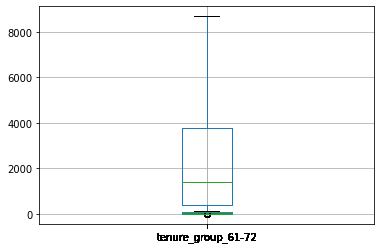

In [33]:
for coloumn in new_data_dummies:
    new_data_dummies.boxplot([coloumn])

IMPORTANT INFERENCE FROM EDA AND VISUALIZATION

High churn is seen in case of:

.> Month to month contracts, No online security, No tech Support, First year of subscription and Fibre Optics

Low churn is seen in case of:

.> Long term contracts, subscription without internet services,The Customers Engaged for 5+ years

Also Features like Gender, Avability has no impact on churn